In [1]:
library(corrplot)
library(PerformanceAnalytics)
library(ggplot2)
library(FactoMineR)
library(factoextra)
library(dplyr)
library(lattice)
library(cluster)
library(visreg)
library(car)
library(tidyr)
library(caret)
library(forcats) # fct_recode function
library(repr)    # for figure size
library(randomForest)

corrplot 0.84 loaded
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Attaching package: ‘dplyr’

The following objects are masked from ‘package:xts’:

    first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    

In [2]:
functions_file = '02_data_processing_functions.ipynb'
system2('jupyter', c('nbconvert', functions_file, '--to=script')) #, '--stdout', stdout = TRUE

In [3]:
source('02_data_processing_functions.r')

In [4]:
ls()

[1] "date_conversion"         "functions_file"         
 [3] "is.Date"                 "many_zeros_delete"      
 [5] "missing_data_remain"     "missing_data_to_none"   
 [7] "modality_completion"     "near_zero"              
 [9] "noqual_conversion"       "quantitative_conversion"
[11] "remain_process"

In [5]:
is.Date <- function(x) inherits(x, 'Date')

# Importation des fichiers

In [6]:
trainfull_origin <- read.csv('./csv/trainfull.csv', row.names=1)
test_origin <- read.csv('./csv/test.csv', row.names=1)
trainfull = trainfull_origin
test = test_origin

In [7]:
options(repr.matrix.max.cols=200)
head(trainfull)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>
60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [8]:
cat("nombre d'input : ", nrow(trainfull))
cat('\n')
cat("nombre de features : ", ncol(trainfull))

nombre d'input :  1460
nombre de features :  80

## Rechercher des colonnes quantitatives et catégorielles

In [9]:
trainfull_quant = select_if(trainfull, is.numeric)
trainfull_qual = select_if(trainfull, is.factor)
cat('nombre de variables quantitatives : ', ncol(trainfull_quant))
cat('\n')
cat('nombre de variables catégorielles : ', ncol(trainfull_qual))

nombre de variables quantitatives :  37
nombre de variables catégorielles :  43

## Observation des features

In [10]:
summary(trainfull)

   MSSubClass       MSZoning     LotFrontage        LotArea        Street    
 Min.   : 20.0   C (all):  10   Min.   : 21.00   Min.   :  1300   Grvl:   6  
 1st Qu.: 20.0   FV     :  65   1st Qu.: 59.00   1st Qu.:  7554   Pave:1454  
 Median : 50.0   RH     :  16   Median : 69.00   Median :  9478              
 Mean   : 56.9   RL     :1151   Mean   : 70.05   Mean   : 10517              
 3rd Qu.: 70.0   RM     : 218   3rd Qu.: 80.00   3rd Qu.: 11602              
 Max.   :190.0                  Max.   :313.00   Max.   :215245              
                                NA's   :259                                  
  Alley      LotShape  LandContour  Utilities      LotConfig    LandSlope 
 Grvl:  50   IR1:484   Bnk:  63    AllPub:1459   Corner : 263   Gtl:1382  
 Pave:  41   IR2: 41   HLS:  50    NoSeWa:   1   CulDSac:  94   Mod:  65  
 NA's:1369   IR3: 10   Low:  36                  FR2    :  47   Sev:  13  
             Reg:925   Lvl:1311                  FR3    :   4             
 

# Traitement des features

## Variables pas vraiment numériques -> conversion en date

- YearBuilt
- YearRemodAdd
- GarageYrBlt
- MoSold
- YrSold

In [11]:
trainfull <- date_conversion(trainfull)
test <- date_conversion(test)

## Variable non quantitative -> conversion en qualitative

In [12]:
trainfull <- noqual_conversion(trainfull)
test <- noqual_conversion(test)

## Variables ordinales transformables :

|    Feature       |       Levels      | Score Possibilty  |
|:-----------------|:-----------------:|:-----------------:|
|LotShape                    |irregular -> regular        |1 to 4|
|LandContour                 |depression -> flat           |1 to 4|
|Utilities                   |electricity only -> all      |1 to 4|
|LandSlope                   |sever -> gentle              |1 to 3|
|ExterQual                   |poor -> excellent            |1 to 5|
|ExterCond                   |poor -> excellent            |1 to 5|
|BsmtQual                    |poor -> excellent            |1 to 5|
|BsmtCond                    |poor -> excellent            |1 to 5|
|BsmtExposure                |no -> good                   |1 to 4|
|BsmtFinType1                |unfinished -> good           |1 to 6|
|BsmtFinType2                |unfinished -> good           |1 to 6|    
|HeatingQC                   |poor -> excellent            |1 to 5|
|CentralAir                  |no / yes                     |0 / 1 |
|Electrical                  |poor -> standard             |1 to 5|
|KitchenQual                 |poor -> excellent            |1 to 5|
|Functional                  |salvage -> typical           |1 to 8|
|FireplaceQu                 |poor -> excellent            |1 to 5|
|GarageFinish                |unfinished -> finshed        |1 to 3|
|GarageQual                  |poor -> excellent            |1 to 5|
|GarageCond                  |poor -> excellent            |1 to 5|
|PavedDrive                  |dirt -> paved                |1 to 3|
|PoolQC                      |fair -> excellent            |1 to 4|
|Fence                       |none -> good                 |1 to 5|

In [13]:
trainfull <- quantitative_conversion(trainfull)
test <- quantitative_conversion(test)

Warning message:
“Unknown levels in `f`: ELO, NoSewr”Warning message:
“Unknown levels in `f`: Po”Warning message:
“Unknown levels in `f`: Po”Warning message:
“Unknown levels in `f`: Ex”Warning message:
“Unknown levels in `f`: Po”Warning message:
“Unknown levels in `f`: Sal”Warning message:
“Unknown levels in `f`: ELO, NoSeWa, NoSewr”Warning message:
“Unknown levels in `f`: Po”Warning message:
“Unknown levels in `f`: Po”Warning message:
“Unknown levels in `f`: Ex”Warning message:
“Unknown levels in `f`: Mix”Warning message:
“Unknown levels in `f`: Po”Warning message:
“Unknown levels in `f`: Sal”Warning message:
“Unknown levels in `f`: Ex”

## Modalités avec peu de données

## Features avec beaucoup de 0 (3rd quartile = 0)

- BsmtFinSF2
- LowQualFinSF
- EnclosedPorch
- X3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal

other nearzero alerts

- LandContour
- LandSlope
- BsmtCond
- BsmtFinType2
- KitchenAbvGr
- Functional
- GarageQual
- GarageCond

In [14]:
trainfull <- many_zeros_delete(trainfull)
test <- many_zeros_delete(test)

## Détails 


|    Feature       |       Modalité    |     Possibilty         |
|:-----------------|:-----------------:|:-----------------------|
|Street            |gravel = 6         |-> supprimer feature    |
|Utilities         |Mode = 1459        |-> supprimer feature    |
|LotConfig         |3frontages = 4     |-> supprimer lignes     |
|Condition2        |mode = 1445/1460   |-> supprimer feature    |
|RoofMatl          |Mode = 1434/1460   |-> RoofMatl 0/1         |
|Foundation        |Wood= 3, stone= 6  |-> supprimer lignes     |
|Heating           |Mode = 1428/1460   |-> convertir en 0/1     |
|Electrical        |Mix=1, fuseP=1     |-> supprimer lignes (finalement conservé car converti en numérique)    |
|GarageType        |2Types=6, carport=9|-> supprimer lignes     |
|MiscFeature       |Mode = 1406/1460   |-> convertir en 0/1     |
|SaleCondition     |AdjLand=4          |-> supprimer lignes     |




In [15]:
trainfull <- remain_process(trainfull)
test <- remain_process(test)

Warning message:
“Unknown levels in `f`: Elev”Warning message:
“Unknown levels in `f`: Floor, OthW”Warning message:
“Unknown levels in `f`: ClyTile, Membran, Metal, Roll”Warning message:
“Unknown levels in `f`: Elev, TenC”

## Données manquantes

|NA's  |Feature      | Possibility |
|-----:|:------------|:------------|
|  257 |LotFrontage  |-> supprimer lignes
| 1350 |Alley        |-> Créer modalité None
|    8 |MasVnrType   |-> supprimer
|    8 |MasVnrArea   |-> supprimer
|   37 |BsmtQual     |-> supprimer
|   36 |BsmtCond     |-> supprimer
|   37 |BsmtExposure |-> supprimer
|   36 |BsmtFinType1 |-> supprimer
|   37 |BsmtFinType2 |-> supprimer
|    1 |Electrical   |-> supprimer
|  673 |FireplaceQu  |-> Créer modalité None
|   78 |GarageType   |-> supprimer feature si corrélée à une autre
|   78 |GarageYrBlt  |-> mettre la valeur de YearBuilt
|   78 |GarageFinish |-> Créer modalité None
| 1430 |PoolQC       |-> Créer modalité None
| 1161 |Fence        |-> Créer modalité None

In [16]:
trainfull <- missing_data_to_none(trainfull)
test <- missing_data_to_none(test)

### Traitement des données NA restantes
* var quantitative -> mise à 0
* var qualitative -> mise au ModelMetrics

In [17]:
trainfull <- missing_data_remain(trainfull)
test <- missing_data_remain(test)

## Vérification si plus de données manquantes

In [18]:
for (i in 1:ncol(trainfull)){
    na_number <- length(which(is.na(trainfull[, i])))
    if (na_number > 0){
        cat(na_number, colnames(select(trainfull, i)),'\n')
    }
}

In [19]:
for (i in 1:ncol(test)){
    na_number <- length(which(is.na(test[, i])))
    if (na_number > 0){
        cat(na_number, colnames(select(test, i)),'\n')
    }
}

## Complément des modalités manquantes dans le set qui entraîne le modèle
 => car pourraient être présentes dans le test ou en production

In [20]:
trainfull <- modality_completion(trainfull)
test <- modality_completion(test)

## Résultat après nettoyage

In [21]:
head(trainfull)

MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<date>,<date>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<date>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<dbl>,<date>,<fct>,<fct>,<int>
60,RL,65,8450,None,4,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003-01-01,2003-01-01,Gable,0,VinylSd,VinylSd,BrkFace,196,4,3,PConc,4,1,6,706,150,856,0,5,1,5,856,854,1710,1,0,2,1,3,4,8,0,None,Attchd,2003-01-01,RFn,2,548,3,0,61,None,None,0,2008-02-01,WD,Normal,208500
20,RL,80,9600,None,4,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976-01-01,1976-01-01,Gable,0,MetalSd,MetalSd,None,0,3,3,CBlock,4,4,5,978,284,1262,0,5,1,5,1262,0,1262,0,1,2,0,3,3,6,1,TA,Attchd,1976-01-01,RFn,2,460,3,298,0,None,None,0,2007-05-01,WD,Normal,181500
60,RL,68,11250,None,3,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001-01-01,2002-01-01,Gable,0,VinylSd,VinylSd,BrkFace,162,4,3,PConc,4,2,6,486,434,920,0,5,1,5,920,866,1786,1,0,2,1,3,4,6,1,TA,Attchd,2001-01-01,RFn,2,608,3,0,42,None,None,0,2008-09-01,WD,Normal,223500
70,RL,60,9550,None,3,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915-01-01,1970-01-01,Gable,0,Wd Sdng,Wd Shng,None,0,3,3,BrkTil,3,1,5,216,540,756,0,4,1,5,961,756,1717,1,0,1,0,3,4,7,1,Gd,Detchd,1998-01-01,Unf,3,642,3,0,35,None,None,0,2006-02-01,WD,Abnorml,140000
60,RL,84,14260,None,3,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000-01-01,2000-01-01,Gable,0,VinylSd,VinylSd,BrkFace,350,4,3,PConc,4,3,6,655,490,1145,0,5,1,5,1145,1053,2198,1,0,2,1,4,4,9,1,TA,Attchd,2000-01-01,RFn,3,836,3,192,84,None,None,0,2008-12-01,WD,Normal,250000
50,RL,85,14115,None,3,Inside,Mitchel,Norm,1Fam,1.5Fin,5,5,1993-01-01,1995-01-01,Gable,0,VinylSd,VinylSd,None,0,3,3,Wood,4,1,6,732,64,796,0,5,1,5,796,566,1362,1,0,1,1,1,3,5,0,None,Attchd,1993-01-01,Unf,2,480,3,40,30,None,MnPrv,1,2009-10-01,WD,Normal,143000


In [22]:
cat("nombre d'input : ", nrow(trainfull))
cat('\n')
cat("nombre de features : ", ncol(trainfull))

nombre d'input :  1460
nombre de features :  61

In [23]:
trainfull_quant = select_if(trainfull, is.numeric)
trainfull_date = select_if(trainfull, is.Date)
trainfull_qual = select_if(trainfull, is.factor)
cat('nombre de variables quantitatives : ', ncol(trainfull_quant))
cat('\n')
cat('nombre de variables type date : ', ncol(trainfull_date))
cat('\n')
cat('nombre de variables catégorielles : ', ncol(trainfull_qual))

nombre de variables quantitatives :  37
nombre de variables type date :  4
nombre de variables catégorielles :  20

# Analyse du dataset

## Résumé par feature

In [24]:
summary(trainfull)

   MSSubClass     MSZoning     LotFrontage        LotArea        Alley     
 20     :536   RL     :1151   Min.   :  0.00   Min.   :  1300   Grvl:  50  
 60     :299   RM     : 218   1st Qu.: 42.00   1st Qu.:  7554   Pave:  41  
 50     :144   FV     :  65   Median : 63.00   Median :  9478   None:1369  
 120    : 87   RH     :  16   Mean   : 57.62   Mean   : 10517              
 30     : 69   C (all):  10   3rd Qu.: 79.00   3rd Qu.: 11602              
 160    : 63   None   :   0   Max.   :313.00   Max.   :215245              
 (Other):262   (Other):   0                                                
    LotShape       LotConfig     Neighborhood   Condition1     BldgType   
 Min.   :1.000   Corner : 263   NAmes  :225   Norm   :1260   1Fam  :1220  
 1st Qu.:3.000   CulDSac:  94   CollgCr:150   Feedr  :  81   2fmCon:  31  
 Median :4.000   FR2    :  47   OldTown:113   Artery :  48   Duplex:  52  
 Mean   :3.592   FR3    :   4   Edwards:100   RRAn   :  26   Twnhs :  43  
 3rd Qu.:4.000   

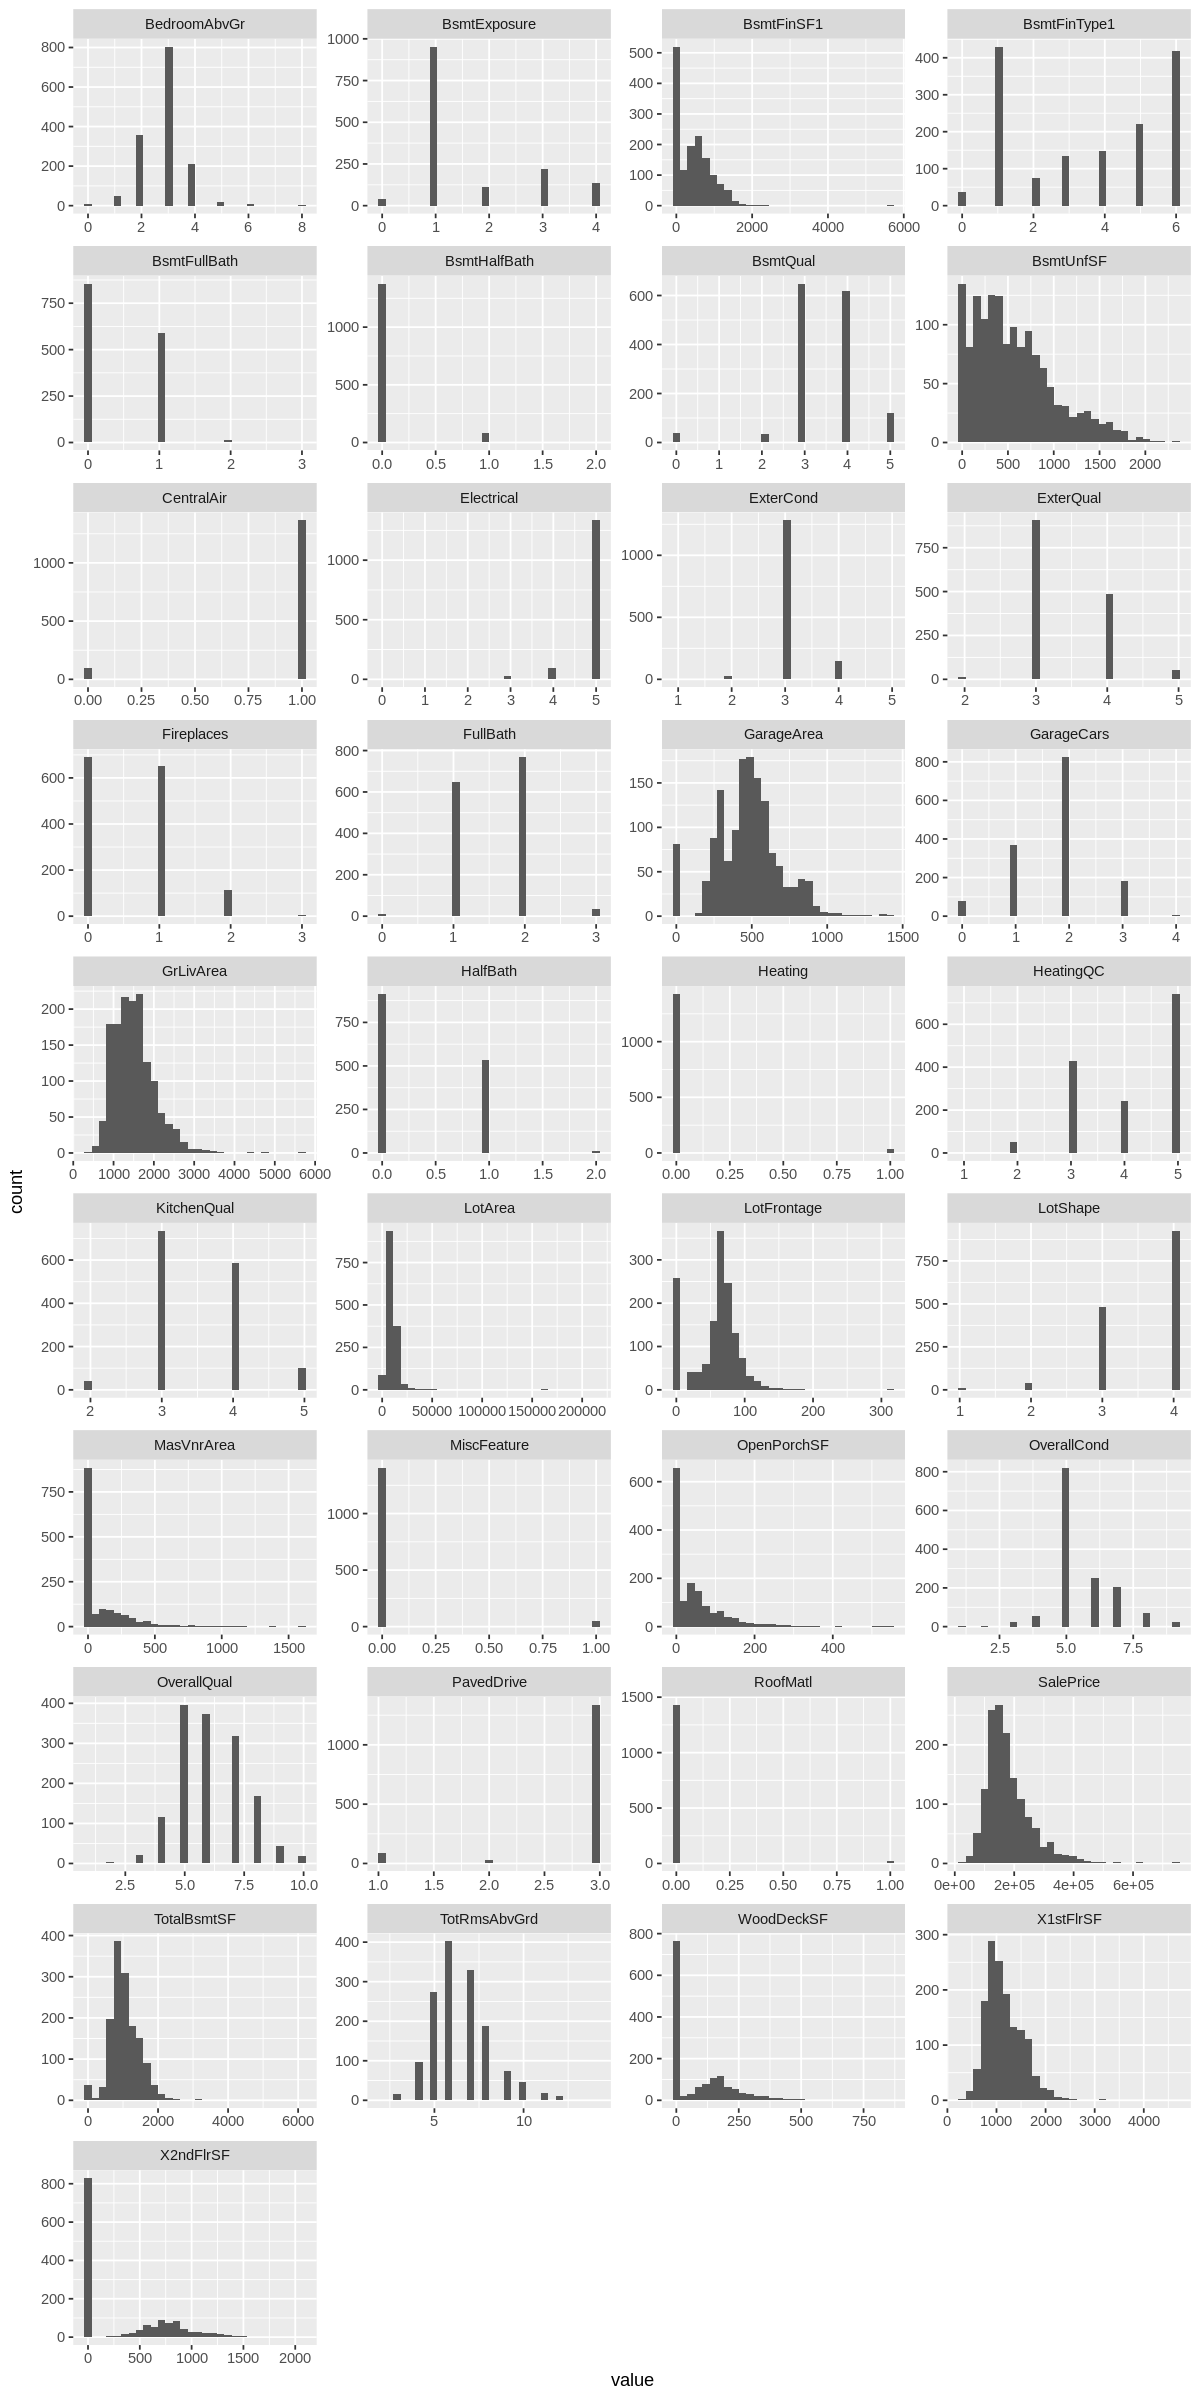

In [25]:
options(repr.plot.width = 10, repr.plot.height = 20)
ggplot(gather(trainfull_quant), aes(value)) +
       geom_histogram(bins = 30) +
       facet_wrap(~key, scales = 'free', ncol = 4)
options(repr.plot.width = 5, repr.plot.height = 3)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

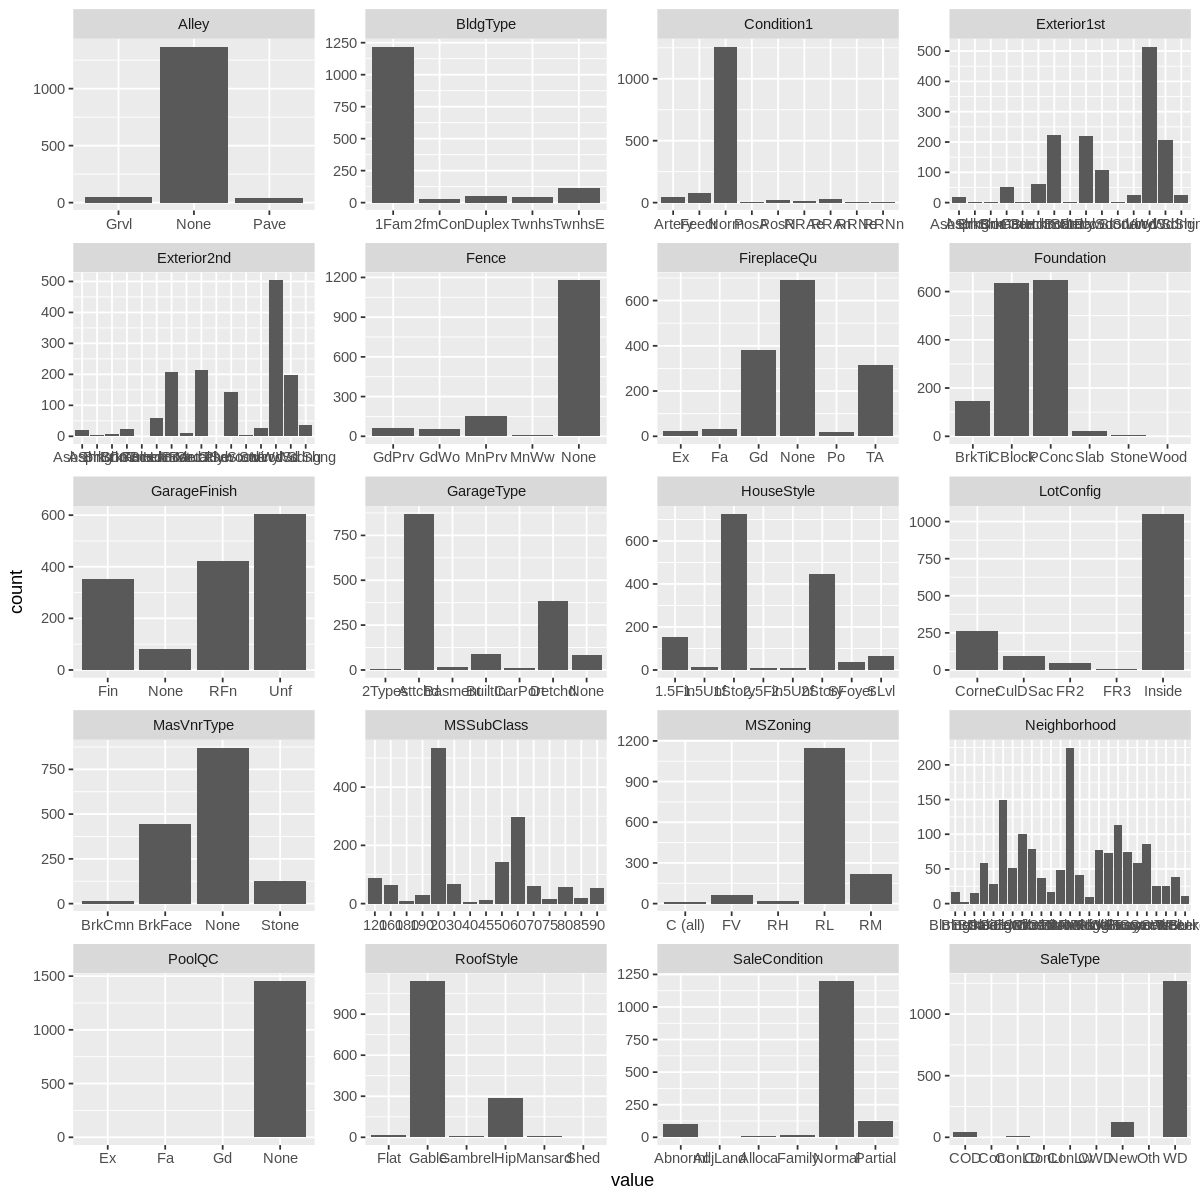

In [26]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(gather(trainfull_qual), aes(x=value)) +
    geom_bar() +
    facet_wrap(~key, scales = 'free', ncol = 4)
options(repr.plot.width = 5, repr.plot.height = 3)

## Matrice de corrélation

### Calcul de la matrice

In [27]:
trainfull_quant = select_if(trainfull, is.numeric)
trainfull_date = select_if(trainfull, is.Date)
trainfull_qual = select_if(trainfull, is.factor)
cat('nombre de variables quantitatives : ', ncol(trainfull_quant))
cat('\n')
cat('nombre de variables type date : ', ncol(trainfull_date))
cat('\n')
cat('nombre de variables catégorielles : ', ncol(trainfull_qual))

nombre de variables quantitatives :  37
nombre de variables type date :  4
nombre de variables catégorielles :  20

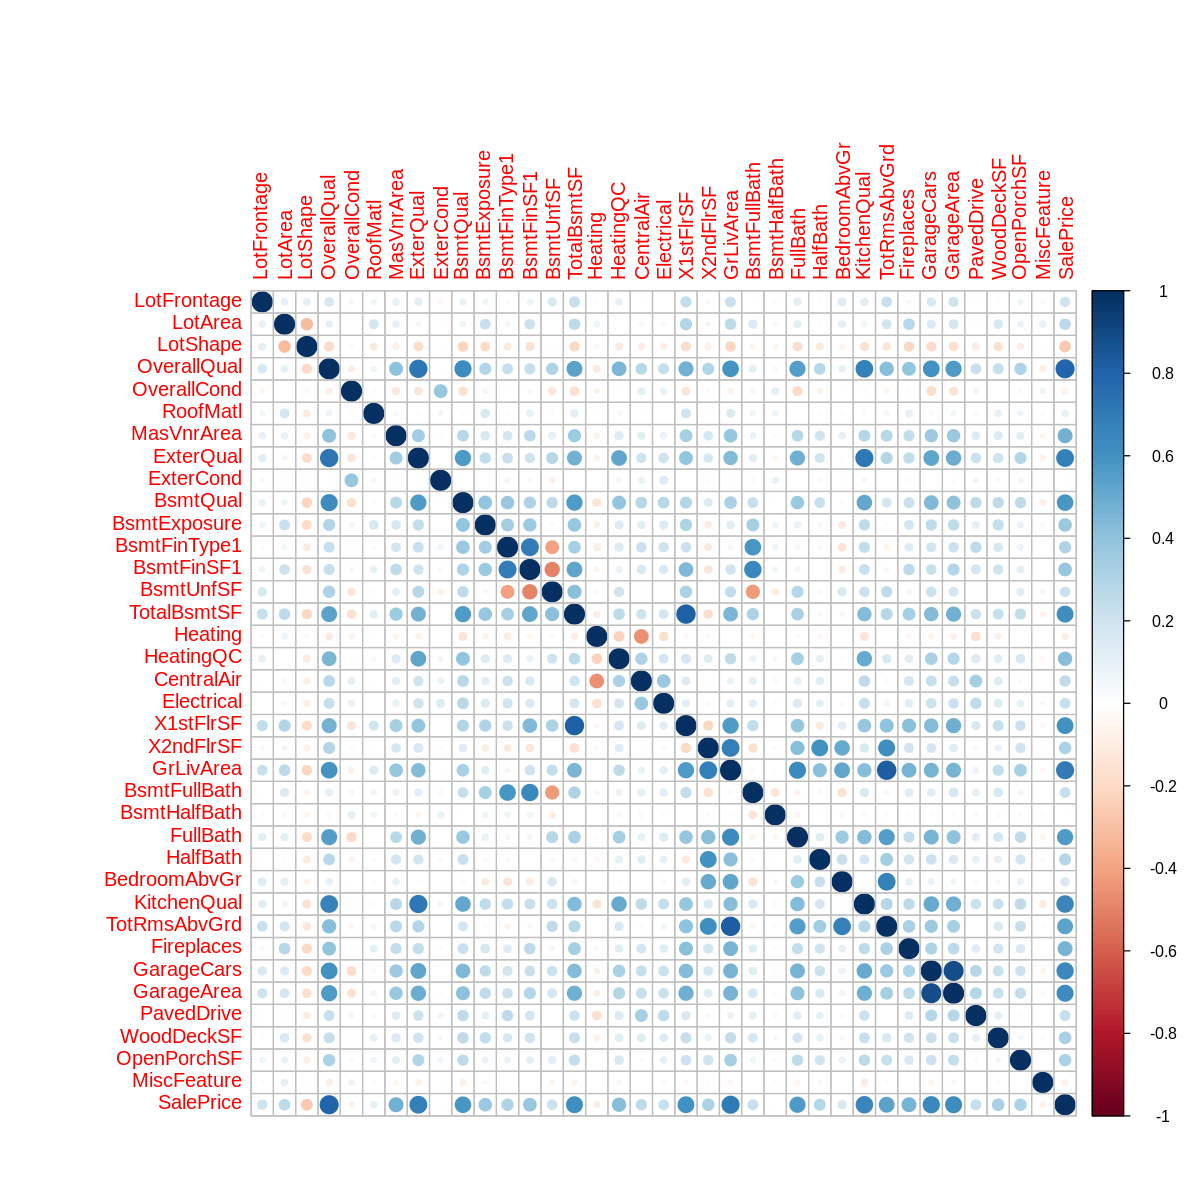

In [28]:
options(repr.plot.width = 10, repr.plot.height = 10)
res.cor <- cor(trainfull_quant)
corrplot(res.cor) # use='pairwise.complete.obs'
options(repr.plot.width = 5, repr.plot.height = 3)

## Analyse en composantes principales

In [29]:
res.pca <- PCA(trainfull_quant)

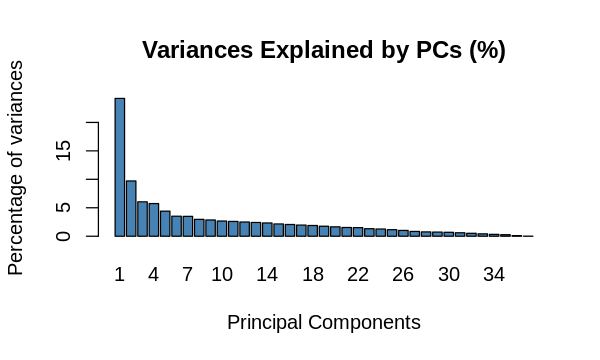

In [30]:
barplot(res.pca$eig[, 2], 
        names.arg = 1:nrow(res.pca$eig), 
        main = "Variances Explained by PCs (%)",
        xlab = "Principal Components",
        ylab = "Percentage of variances",
        col ="steelblue")

comp 1  comp 2  comp 3  comp 4  comp 5  comp 6  comp 7  comp 8  comp 9 comp 10 
     24      34      40      46      50      54      57      60      63      66 
comp 11 comp 12 comp 13 comp 14 comp 15 comp 16 comp 17 comp 18 comp 19 comp 20 
     69      71      73      75      77      79      81      83      85      87 
comp 21 comp 22 comp 23 comp 24 comp 25 comp 26 comp 27 comp 28 comp 29 comp 30 
     89      91      92      93      94      95      96      97      98      99 
comp 31 comp 32 comp 33 
    100     101     101

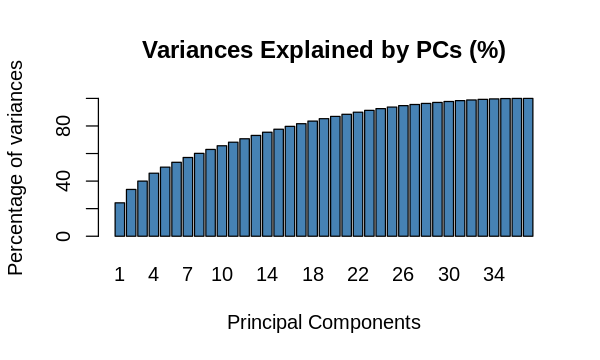

In [31]:
barplot(cumsum(res.pca$eig[, 2]), 
        names.arg = 1:nrow(res.pca$eig), 
        main = "Variances Explained by PCs (%)",
        xlab = "Principal Components",
        ylab = "Percentage of variances",
        col ="steelblue")
cumsum(round(res.pca$eig[1:33, 2]))

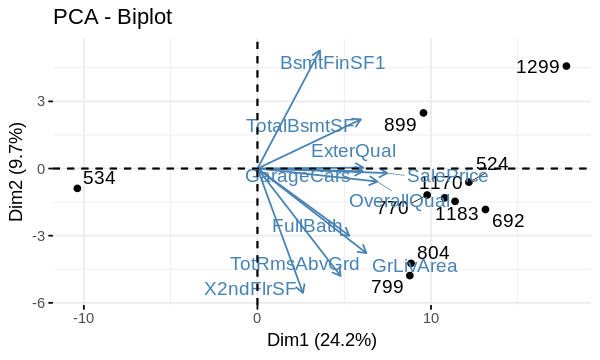

In [32]:
fviz_pca_biplot(res.pca, repel = T,
                select.var = list(contrib = 10),
                select.ind = list(contrib.ind = 10)) # , col.ind=factor(trainfull$cluster)

# Exportation du trainfull modifié

In [33]:
write.csv(trainfull, './csv/trainfull_modifie.csv')

In [34]:
write.csv(test, './csv/test_modifie.csv')

In [36]:
for (i in 1:ncol(trainfull)){
    na_number <- length(which(is.na(trainfull[, i])))
    if (na_number > 0){
        cat(na_number, colnames(select(trainfull, i)),'\n')
    }
}

In [37]:
table(trainfull$MSZoning)


C (all)      FV      RH      RL      RM       A       C       I      RP 
     10      65      16    1151     218       0       0       0       0 

In [40]:
trainfull

MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<date>,<date>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<date>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<dbl>,<date>,<fct>,<fct>,<int>
60,RL,65,8450,None,4,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003-01-01,2003-01-01,Gable,0,VinylSd,VinylSd,BrkFace,196,4,3,PConc,4,1,6,706,150,856,0,5,1,5,856,854,1710,1,0,2,1,3,4,8,0,None,Attchd,2003-01-01,RFn,2,548,3,0,61,None,None,0,2008-02-01,WD,Normal,208500
20,RL,80,9600,None,4,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976-01-01,1976-01-01,Gable,0,MetalSd,MetalSd,None,0,3,3,CBlock,4,4,5,978,284,1262,0,5,1,5,1262,0,1262,0,1,2,0,3,3,6,1,TA,Attchd,1976-01-01,RFn,2,460,3,298,0,None,None,0,2007-05-01,WD,Normal,181500
60,RL,68,11250,None,3,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001-01-01,2002-01-01,Gable,0,VinylSd,VinylSd,BrkFace,162,4,3,PConc,4,2,6,486,434,920,0,5,1,5,920,866,1786,1,0,2,1,3,4,6,1,TA,Attchd,2001-01-01,RFn,2,608,3,0,42,None,None,0,2008-09-01,WD,Normal,223500
70,RL,60,9550,None,3,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915-01-01,1970-01-01,Gable,0,Wd Sdng,Wd Shng,None,0,3,3,BrkTil,3,1,5,216,540,756,0,4,1,5,961,756,1717,1,0,1,0,3,4,7,1,Gd,Detchd,1998-01-01,Unf,3,642,3,0,35,None,None,0,2006-02-01,WD,Abnorml,140000
60,RL,84,14260,None,3,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000-01-01,2000-01-01,Gable,0,VinylSd,VinylSd,BrkFace,350,4,3,PConc,4,3,6,655,490,1145,0,5,1,5,1145,1053,2198,1,0,2,1,4,4,9,1,TA,Attchd,2000-01-01,RFn,3,836,3,192,84,None,None,0,2008-12-01,WD,Normal,250000
50,RL,85,14115,None,3,Inside,Mitchel,Norm,1Fam,1.5Fin,5,5,1993-01-01,1995-01-01,Gable,0,VinylSd,VinylSd,None,0,3,3,Wood,4,1,6,732,64,796,0,5,1,5,796,566,1362,1,0,1,1,1,3,5,0,None,Attchd,1993-01-01,Unf,2,480,3,40,30,None,MnPrv,1,2009-10-01,WD,Normal,143000
20,RL,75,10084,None,4,Inside,Somerst,Norm,1Fam,1Story,8,5,2004-01-01,2005-01-01,Gable,0,VinylSd,VinylSd,Stone,186,4,3,PConc,5,3,6,1369,317,1686,0,5,1,5,1694,0,1694,1,0,2,0,3,4,7,1,Gd,Attchd,2004-01-01,RFn,2,636,3,255,57,None,None,0,2007-08-01,WD,Normal,307000
60,RL,0,10382,None,3,Corner,NWAmes,PosN,1Fam,2Story,7,6,1973-01-01,1973-01-01,Gable,0,HdBoard,HdBoard,Stone,240,3,3,CBlock,4,2,5,859,216,1107,0,5,1,5,1107,983,2090,1,0,2,1,3,3,7,2,TA,Attchd,1973-01-01,RFn,2,484,3,235,204,None,None,1,2009-11-01,WD,Normal,200000
50,RM,51,6120,None,4,Inside,OldTown,Artery,1Fam,1.5Fin,7,5,1931-01-01,1950-01-01,Gable,0,BrkFace,Wd Shng,None,0,3,3,BrkTil,3,1,1,0,952,952,0,4,1,3,1022,752,1774,0,0,2,0,2,3,8,2,TA,Detchd,1931-01-01,Unf,2,468,3,90,0,None,None,0,2008-04-01,WD,Abnorml,129900
